In [53]:
import sys, os, time
import matplotlib.pyplot as plt
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
from google.colab import drive
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Importing data

In [0]:
train_file = np.load("/content/gdrive/My Drive/Colab Notebooks/ELEC97052 Selected Topics in Machine Learning/CW3/assets/train.npz", allow_pickle=True)
train_X, train_Y, action_names = train_file['x'], train_file['y'], train_file['action_names']

test_file = np.load("/content/gdrive/My Drive/Colab Notebooks/ELEC97052 Selected Topics in Machine Learning/CW3/assets/test.npz", allow_pickle=True)
test_X, test_Y = test_file['x'], test_file['y']

# information about first element in training dataset
input = train_X[0] # [N, 21*3]
output_label = train_Y[0] # starts at 1!
action_name = action_names[output_label - 1]

Max number of timesteps

In [0]:
max = 0
for i in range(0,950):
  input = train_X[i]
  if input.shape[0] > max:
    max = input.shape[0]

print(max)

1151


Zero padding (actually -99 padding)

In [56]:
x_train = -99*np.ones(shape=(train_X.shape[0],1151,63), dtype=float)
for i in range(0, train_X.shape[0]):
  pose = train_X[i]
  for j in range(0, pose.shape[0]):
    for k in range(0, pose.shape[1]):
      x_train[i][j][k] = pose[j][k]

x_test = -99*np.ones(shape=(test_X.shape[0],1151,63), dtype=float)
for i in range(0, test_X.shape[0]):
  pose = test_X[i]
  for j in range(0, pose.shape[0]):
    for k in range(0, pose.shape[1]):
      x_test[i][j][k] = pose[j][k]

y_train = to_categorical(train_Y-1, num_classes=45)
y_test = to_categorical(test_Y-1, num_classes=45)


print(x_train.shape)
print(x_test.shape)

(950, 1151, 63)
(225, 1151, 63)


# **Model**

In [0]:
def create_model(lr, lstm): 
  model = tf.keras.Sequential()
  model.add(layers.Masking(mask_value=-99))
  model.add(layers.LSTM(lstm, return_sequences=True, input_shape=(1151,63)))
  model.add(layers.LSTM(lstm, return_sequences=True))
  model.add(layers.LSTM(lstm))
  model.add(layers.Dropout(0.2))
  model.add(layers.Dense(45, activation='softmax'))

  adam = tf.keras.optimizers.Adam(learning_rate=lr)
  model.compile(optimizer=adam, loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
  return model

In [0]:
class TimeHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, batch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, batch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

Creating one model

In [99]:
time_callback = TimeHistory()
model = create_model(0.001, 256)
model.fit(x_train, y_train, epochs = 50, batch_size=5, callbacks=[time_callback])
times = time_callback.times
print(sum(times))

Epoch 1/50
190/190 [==============================] - 6s 30ms/step - loss: 3.6390 - accuracy: 0.0653
Epoch 2/50
190/190 [==============================] - 6s 30ms/step - loss: 3.5038 - accuracy: 0.0905
Epoch 3/50
190/190 [==============================] - 6s 30ms/step - loss: 3.3299 - accuracy: 0.1242
Epoch 4/50
190/190 [==============================] - 6s 30ms/step - loss: 3.2019 - accuracy: 0.1337
Epoch 5/50
190/190 [==============================] - 6s 30ms/step - loss: 2.9620 - accuracy: 0.1695
Epoch 6/50
190/190 [==============================] - 6s 30ms/step - loss: 3.4780 - accuracy: 0.0958
Epoch 7/50
190/190 [==============================] - 6s 30ms/step - loss: 3.3092 - accuracy: 0.1179
Epoch 8/50
190/190 [==============================] - 6s 30ms/step - loss: 2.8184 - accuracy: 0.2168
Epoch 9/50
190/190 [==============================] - 6s 30ms/step - loss: 2.8075 - accuracy: 0.2495
Epoch 10/50
190/190 [==============================] - 6s 30ms/step - loss: 2.5241 - accura

In [76]:
print(sum(times))

36.59942841529846


Testing one model

In [100]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 20ms/step - loss: 1.0879 - accuracy: 0.7111


[1.0879006385803223, 0.7111111283302307]

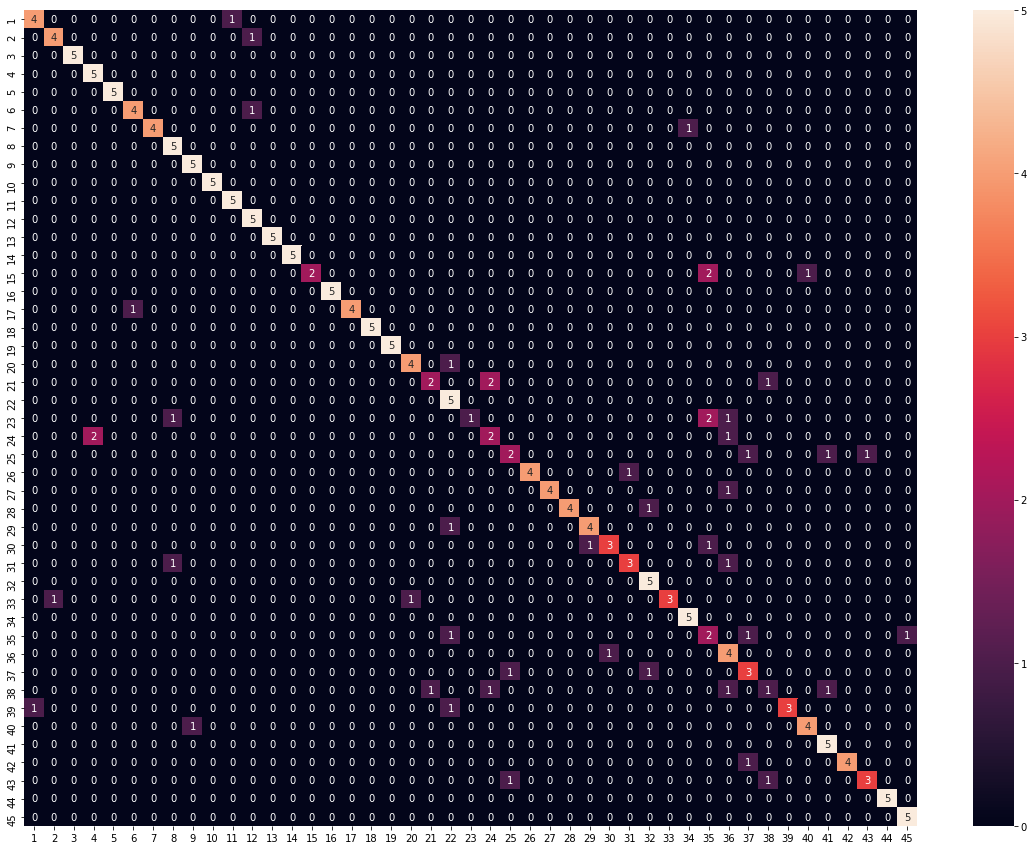

In [48]:
#cm = confusion_matrix(y_test.argmax(axis=1), model.predict(x_test).argmax(axis=1))
df_cm = pd.DataFrame(cm, index=[i for i in range(1,46)], columns=[i for i in range(1,46)])
plt.figure(figsize = (20,15))
sn.heatmap(df_cm, annot=True)

In [14]:
model = create_model(0.001, 256)
model.fit(x_train, y_train, epochs = 50, batch_size=50)

Epoch 1/50
19/19 [==============================] - 10s 540ms/step - loss: 3.6693 - accuracy: 0.0642
Epoch 2/50
19/19 [==============================] - 10s 531ms/step - loss: 3.2180 - accuracy: 0.1316
Epoch 3/50
19/19 [==============================] - 10s 530ms/step - loss: 3.0694 - accuracy: 0.1737
Epoch 4/50
19/19 [==============================] - 10s 540ms/step - loss: 2.8194 - accuracy: 0.2337
Epoch 5/50
19/19 [==============================] - 10s 535ms/step - loss: 3.0282 - accuracy: 0.2074
Epoch 6/50
19/19 [==============================] - 10s 537ms/step - loss: 3.3073 - accuracy: 0.1295
Epoch 7/50
19/19 [==============================] - 10s 547ms/step - loss: 2.9008 - accuracy: 0.2168
Epoch 8/50
19/19 [==============================] - 10s 540ms/step - loss: 2.6488 - accuracy: 0.2621
Epoch 9/50
19/19 [==============================] - 10s 545ms/step - loss: 2.4648 - accuracy: 0.3168
Epoch 10/50
19/19 [==============================] - 10s 532ms/step - loss: 3.4379 - accura

Testing different learning rates

In [0]:
acc_data = np.zeros(10)
loss_data = np.zeros(10)

for k in range(0,4):
  tot_acc, tot_loss = 0, 0
  for i in range(0,10):
    model = create_model(0.0001*(10**k), 128) # possible LRs: 0.0001, 0.001, 0.01, 0.1
    model.fit(x_train, y_train, epochs = 50, batch_size=50)
    loss, acc = model.evaluate(x_test, y_test)
    tot_loss = tot_loss + loss
    tot_acc = tot_acc + acc
  acc_data[k] = tot_acc/10
  loss_data[k] = tot_loss/10

print("accuracy:")
print(acc_data)
print("loss:")
print(loss_data)

Different LSTM sizes

In [0]:
acc_data = np.zeros(10)
loss_data = np.zeros(10)

for k in range(0,6):
  tot_acc, tot_loss = 0, 0
  for i in range(0,10):
    model = create_model(0.001, 2**(4+k)) # possible LSTM sizes: 16, 32, 64, 128, 256, 512
    model.fit(x_train, y_train, epochs = 50, batch_size=50)
    loss, acc = model.evaluate(x_test, y_test)
    tot_loss = tot_loss + loss
    tot_acc = tot_acc + acc
  acc_data[k] = tot_acc/10
  loss_data[k] = tot_loss/10

print("accuracy:")
print(acc_data)
print("loss:")
print(loss_data)

Streaming output truncated to the last 5000 lines.
19/19 [==============================] - 0s 21ms/step - loss: 2.1802 - accuracy: 0.4179
Epoch 30/50
19/19 [==============================] - 0s 22ms/step - loss: 2.1771 - accuracy: 0.4326
Epoch 31/50
19/19 [==============================] - 0s 22ms/step - loss: 2.2153 - accuracy: 0.4116
Epoch 32/50
19/19 [==============================] - 0s 22ms/step - loss: 2.1331 - accuracy: 0.4242
Epoch 33/50
19/19 [==============================] - 0s 23ms/step - loss: 2.2300 - accuracy: 0.3958
Epoch 34/50
19/19 [==============================] - 0s 22ms/step - loss: 2.3348 - accuracy: 0.3674
Epoch 35/50
19/19 [==============================] - 0s 23ms/step - loss: 2.2382 - accuracy: 0.4126
Epoch 36/50
19/19 [==============================] - 0s 22ms/step - loss: 2.1718 - accuracy: 0.4221
Epoch 37/50
19/19 [==============================] - 0s 22ms/step - loss: 2.1012 - accuracy: 0.4411
Epoch 38/50
19/19 [==============================] - 0s 23ms/

Different batch sizes

In [0]:
acc_data = np.zeros(10)
loss_data = np.zeros(10)

for k in range(0,3):
  tot_acc, tot_loss = 0, 0
  for i in range(0,10):
    model = create_model(0.001, 128)
    model.fit(x_train, y_train, epochs = 50, batch_size=5*(2**k)) # batch sizes 5, 10, 20 (test 50 and 100 separately)
    loss, acc = model.evaluate(x_test, y_test)
    tot_loss = tot_loss + loss
    tot_acc = tot_acc + acc
  acc_data[k] = tot_acc/10
  loss_data[k] = tot_loss/10

print("accuracy:")
print(acc_data)
print("loss:")
print(loss_data)

Epoch 1/50
190/190 [==============================] - 2s 11ms/step - loss: 3.5714 - accuracy: 0.0905
Epoch 2/50
190/190 [==============================] - 2s 10ms/step - loss: 3.1199 - accuracy: 0.1747
Epoch 3/50
190/190 [==============================] - 2s 11ms/step - loss: 2.8098 - accuracy: 0.2474
Epoch 4/50
190/190 [==============================] - 2s 11ms/step - loss: 2.7709 - accuracy: 0.2411
Epoch 5/50
190/190 [==============================] - 2s 11ms/step - loss: 2.4988 - accuracy: 0.3147
Epoch 6/50
190/190 [==============================] - 2s 11ms/step - loss: 2.4303 - accuracy: 0.3389
Epoch 7/50
190/190 [==============================] - 2s 10ms/step - loss: 2.5637 - accuracy: 0.3158
Epoch 8/50
190/190 [==============================] - 2s 11ms/step - loss: 2.1389 - accuracy: 0.4063
Epoch 9/50
190/190 [==============================] - 2s 11ms/step - loss: 2.0393 - accuracy: 0.4358
Epoch 10/50
190/190 [==============================] - 2s 11ms/step - loss: 1.8891 - accura

In [0]:
acc_data = np.zeros(10)
loss_data = np.zeros(10)

for k in range(0,2):
  tot_acc, tot_loss = 0, 0
  for i in range(0,10):
    model = create_model(0.001, 128)
    model.fit(x_train, y_train, epochs = 50, batch_size=50*(2**k)) # batch sizes 50 and 100
    loss, acc = model.evaluate(x_test, y_test)
    tot_loss = tot_loss + loss
    tot_acc = tot_acc + acc
  acc_data[k] = tot_acc/10
  loss_data[k] = tot_loss/10

print("accuracy:")
print(acc_data)
print("loss:")
print(loss_data)

Epoch 1/50
19/19 [==============================] - 1s 33ms/step - loss: 3.7568 - accuracy: 0.0495
Epoch 2/50
19/19 [==============================] - 1s 29ms/step - loss: 3.4634 - accuracy: 0.1232
Epoch 3/50
19/19 [==============================] - 1s 30ms/step - loss: 3.1595 - accuracy: 0.1811
Epoch 4/50
19/19 [==============================] - 1s 28ms/step - loss: 2.8600 - accuracy: 0.2663
Epoch 5/50
19/19 [==============================] - 1s 29ms/step - loss: 2.7300 - accuracy: 0.2916
Epoch 6/50
19/19 [==============================] - 1s 29ms/step - loss: 2.5645 - accuracy: 0.3379
Epoch 7/50
19/19 [==============================] - 1s 29ms/step - loss: 2.4448 - accuracy: 0.3421
Epoch 8/50
19/19 [==============================] - 1s 28ms/step - loss: 2.2966 - accuracy: 0.3842
Epoch 9/50
19/19 [==============================] - 1s 29ms/step - loss: 2.2076 - accuracy: 0.4221
Epoch 10/50
19/19 [==============================] - 1s 29ms/step - loss: 2.1677 - accuracy: 0.4168
Epoch 11/

Sweep through LR with best batch (5) and LSTM (256) sizes

In [0]:
acc_data = np.zeros(10)
loss_data = np.zeros(10)

for k in range(0,4):
  tot_acc, tot_loss = 0, 0
  for i in range(0,10):
    model = create_model(0.0001*(10**k), 256) # possible LRs: 0.0001, 0.001, 0.01, 0.1
    model.fit(x_train, y_train, epochs = 50, batch_size=5)
    loss, acc = model.evaluate(x_test, y_test)
    tot_loss = tot_loss + loss
    tot_acc = tot_acc + acc
  acc_data[k] = tot_acc/10
  loss_data[k] = tot_loss/10

print("accuracy:")
print(acc_data)
print("loss:")
print(loss_data)

Epoch 1/50
190/190 [==============================] - 3s 13ms/step - loss: 3.7513 - accuracy: 0.0568
Epoch 2/50
190/190 [==============================] - 3s 13ms/step - loss: 3.4177 - accuracy: 0.1295
Epoch 3/50
190/190 [==============================] - 3s 14ms/step - loss: 3.0532 - accuracy: 0.2232
Epoch 4/50
190/190 [==============================] - 3s 13ms/step - loss: 2.8215 - accuracy: 0.2505
Epoch 5/50
190/190 [==============================] - 3s 13ms/step - loss: 2.7020 - accuracy: 0.2947
Epoch 6/50
190/190 [==============================] - 3s 13ms/step - loss: 2.4254 - accuracy: 0.3621
Epoch 7/50
190/190 [==============================] - 3s 13ms/step - loss: 2.4151 - accuracy: 0.3579
Epoch 8/50
190/190 [==============================] - 3s 13ms/step - loss: 2.2631 - accuracy: 0.4021
Epoch 9/50
190/190 [==============================] - 3s 14ms/step - loss: 2.1265 - accuracy: 0.4453
Epoch 10/50
190/190 [==============================] - 3s 13ms/step - loss: 1.9906 - accura

In [0]:
print("accuracy:")
print(acc_data)
print("loss:")
print(loss_data)

accuracy:
[0.60311111 0.73688889 0.65288889 0.13288889 0.         0.
 0.         0.         0.         0.        ]
loss:
[1.26724223 0.87488256 1.28459346        nan 0.         0.
 0.         0.         0.         0.        ]
